# GPGN409 homework 
your name: Benjamin Nguyen

In [27]:
using DataFrames, CSV
using LinearAlgebra
using Printf
using CairoMakie

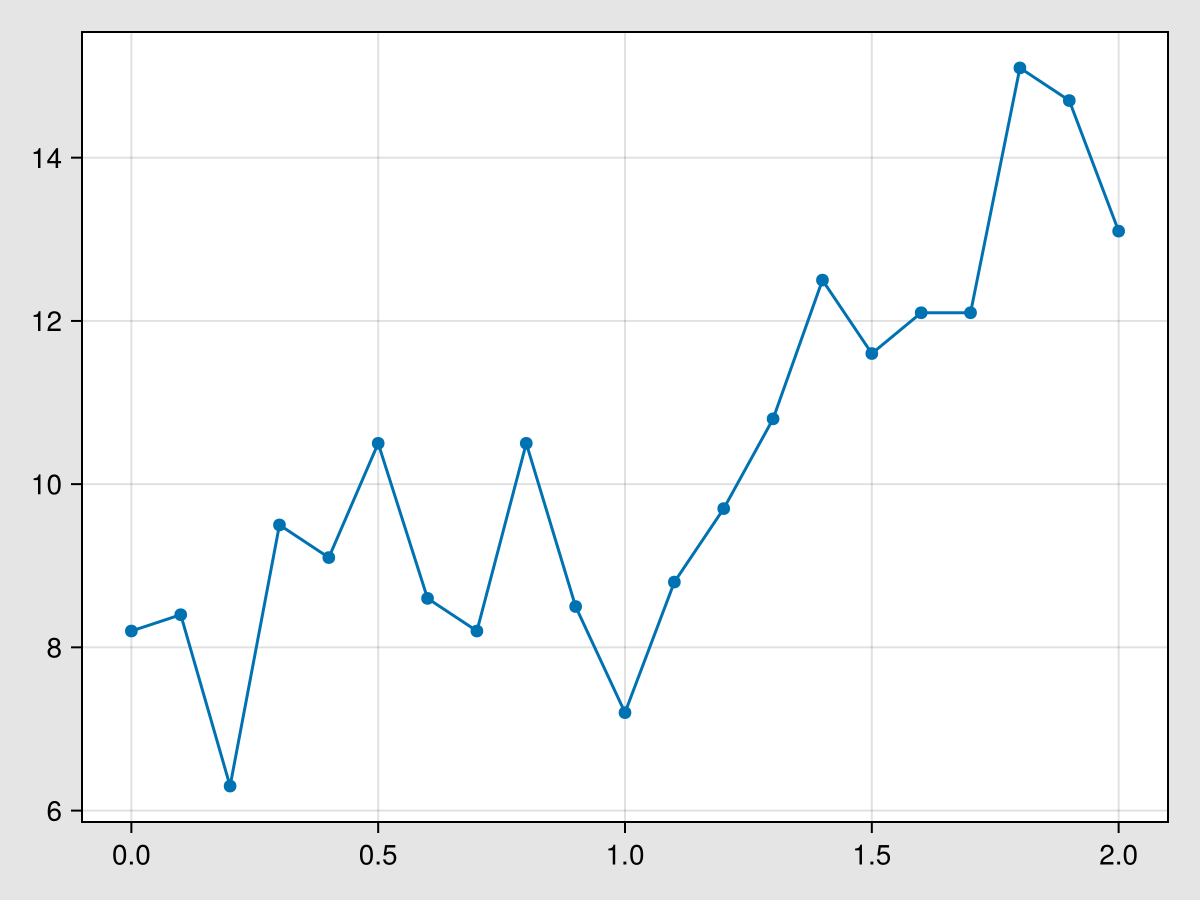

In [28]:
seconds = 0:0.1:2
measurements = [8.2, 8.4, 6.3, 9.5, 9.1, 10.5, 8.6, 8.2, 10.5, 8.5, 7.2,
        8.8, 9.7, 10.8, 12.5, 11.6, 12.1, 12.1, 15.1, 14.7, 13.1]

lines(seconds, measurements)
scatter!(seconds, measurements)
current_figure()

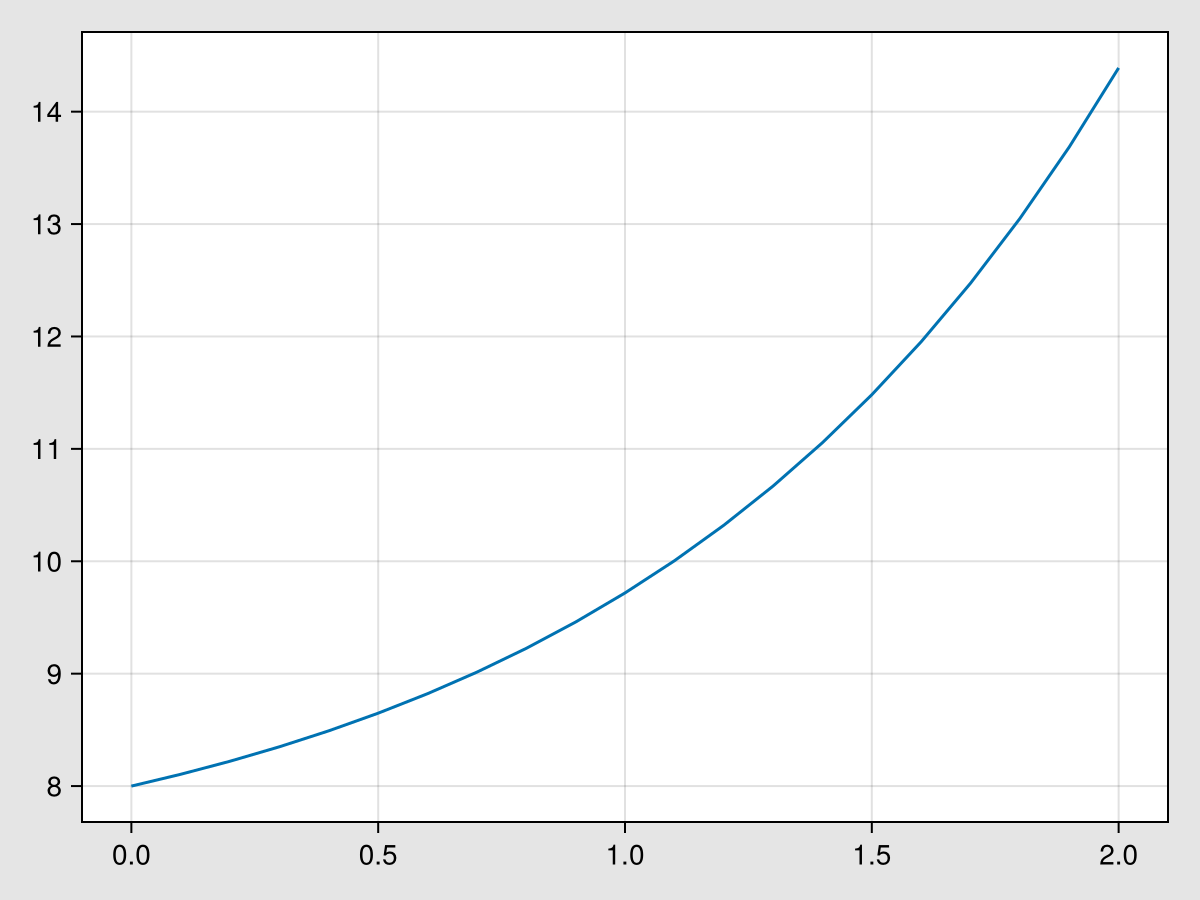

In [29]:
lines(seconds, exp.(seconds) .+ 7)

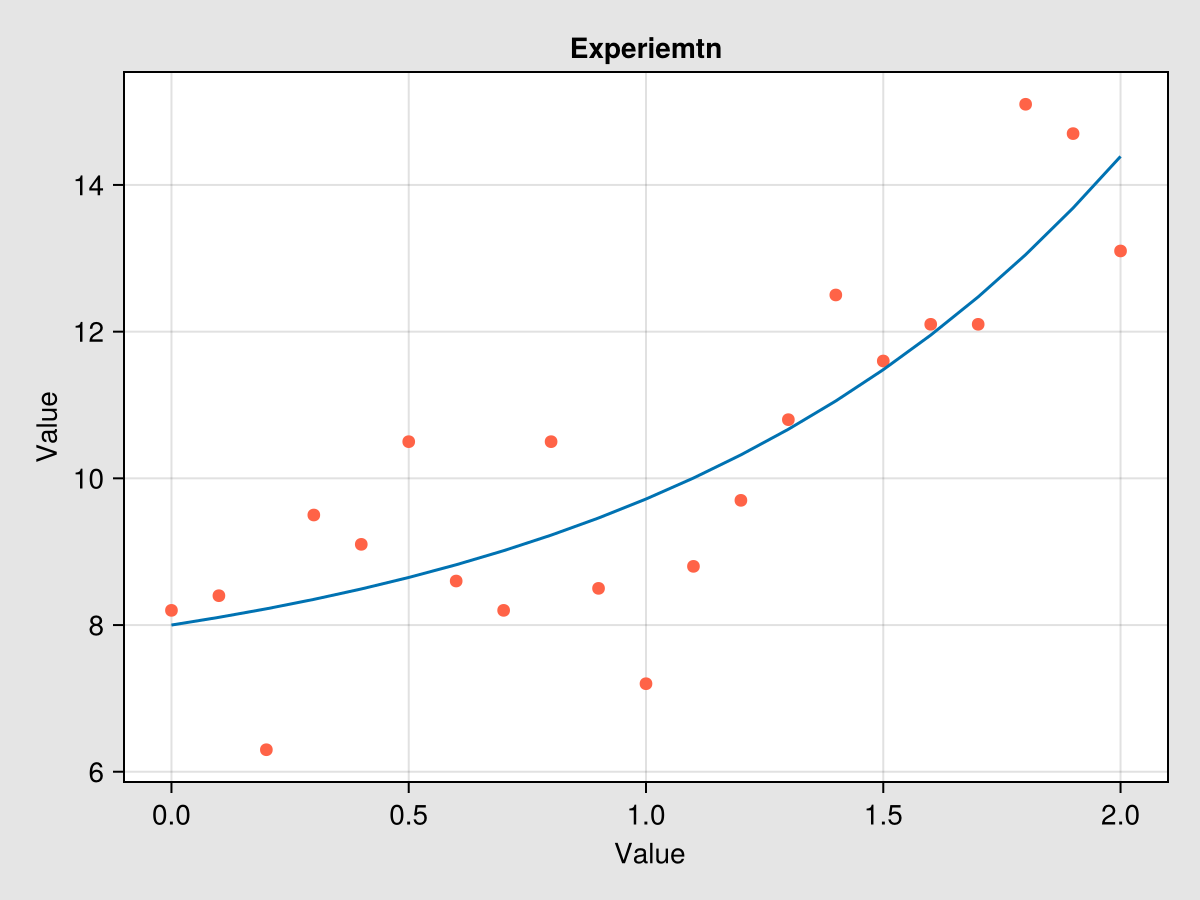

In [30]:
f = Figure()
ax = Axis(f[1, 1],
    title = "Experiemtn",
    ylabel = "Value",
    xlabel = " Value"

)

scatter!(ax, seconds, measurements, color= :tomato)
lines!(ax, seconds, exp.(seconds) .+ 7)
f

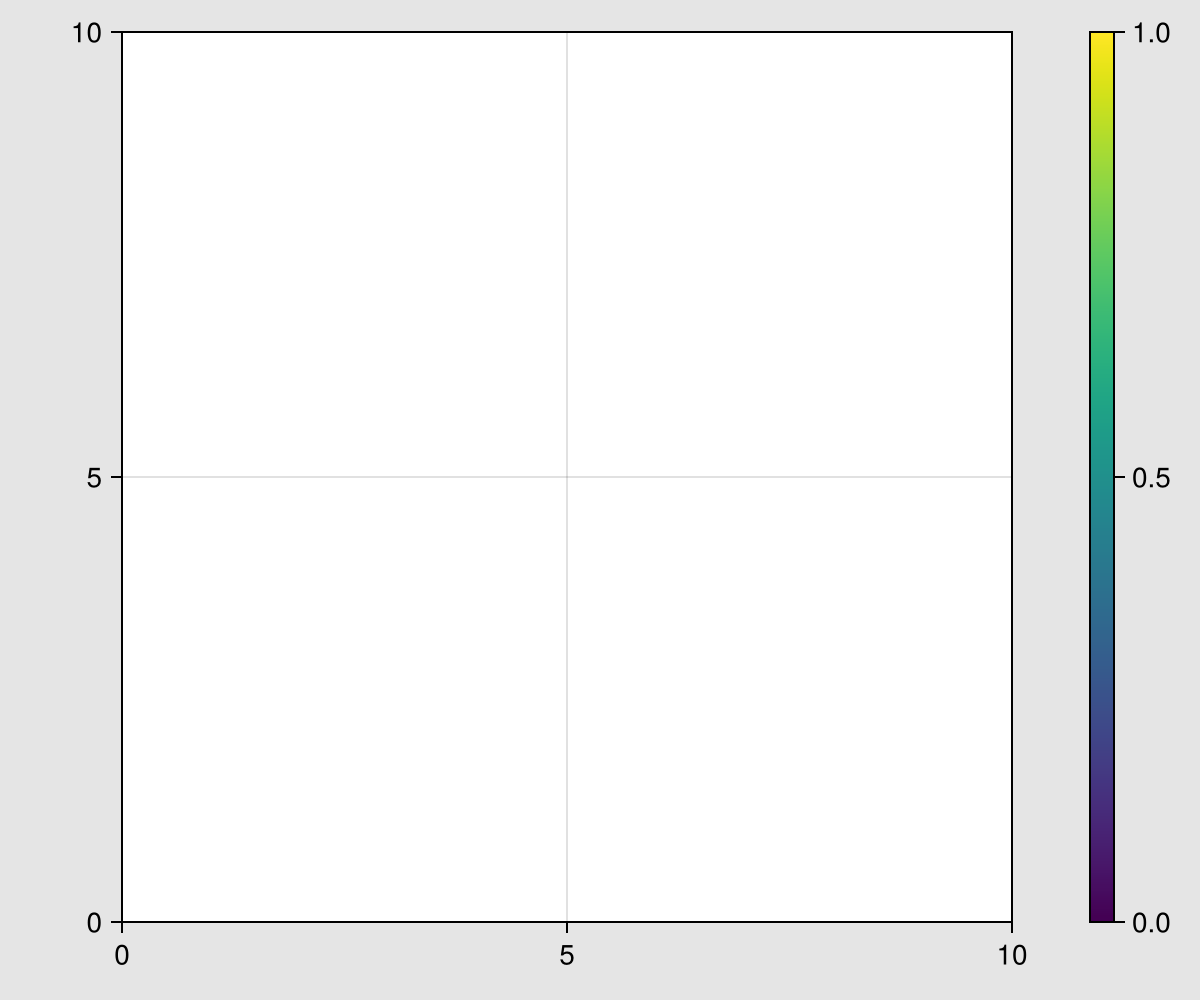

In [35]:
using CairoMakie
set_theme!(backgroundcolor = :gray90)

f = Figure(size = (600, 500))
ax = Axis(f[1, 1], aspect = 1)
Colorbar(f[1, 2])
# Colorbar(f[1,3])
f

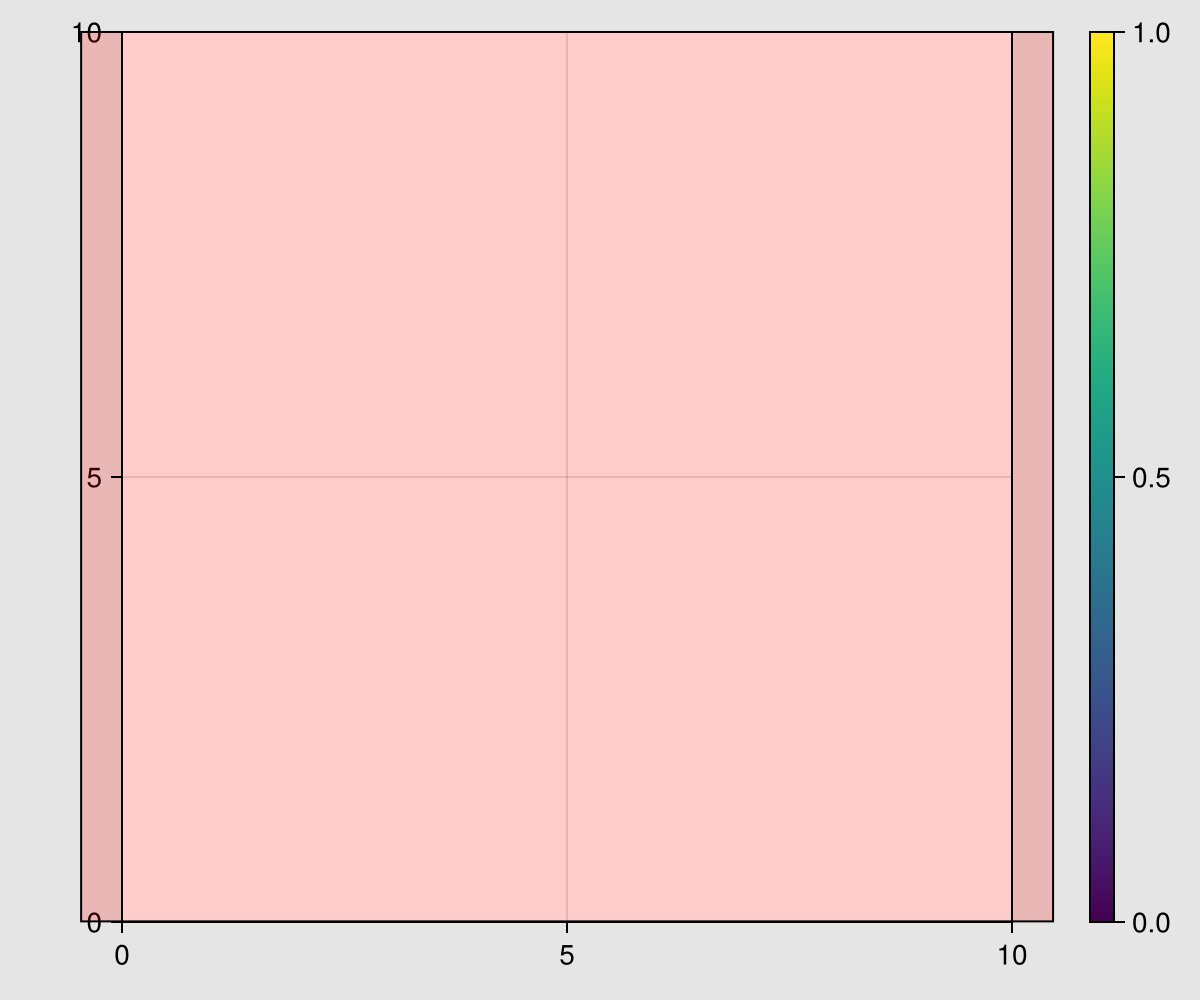

In [36]:
Box(f[1, 1], color = (:red, 0.2), strokewidth = 1)
f

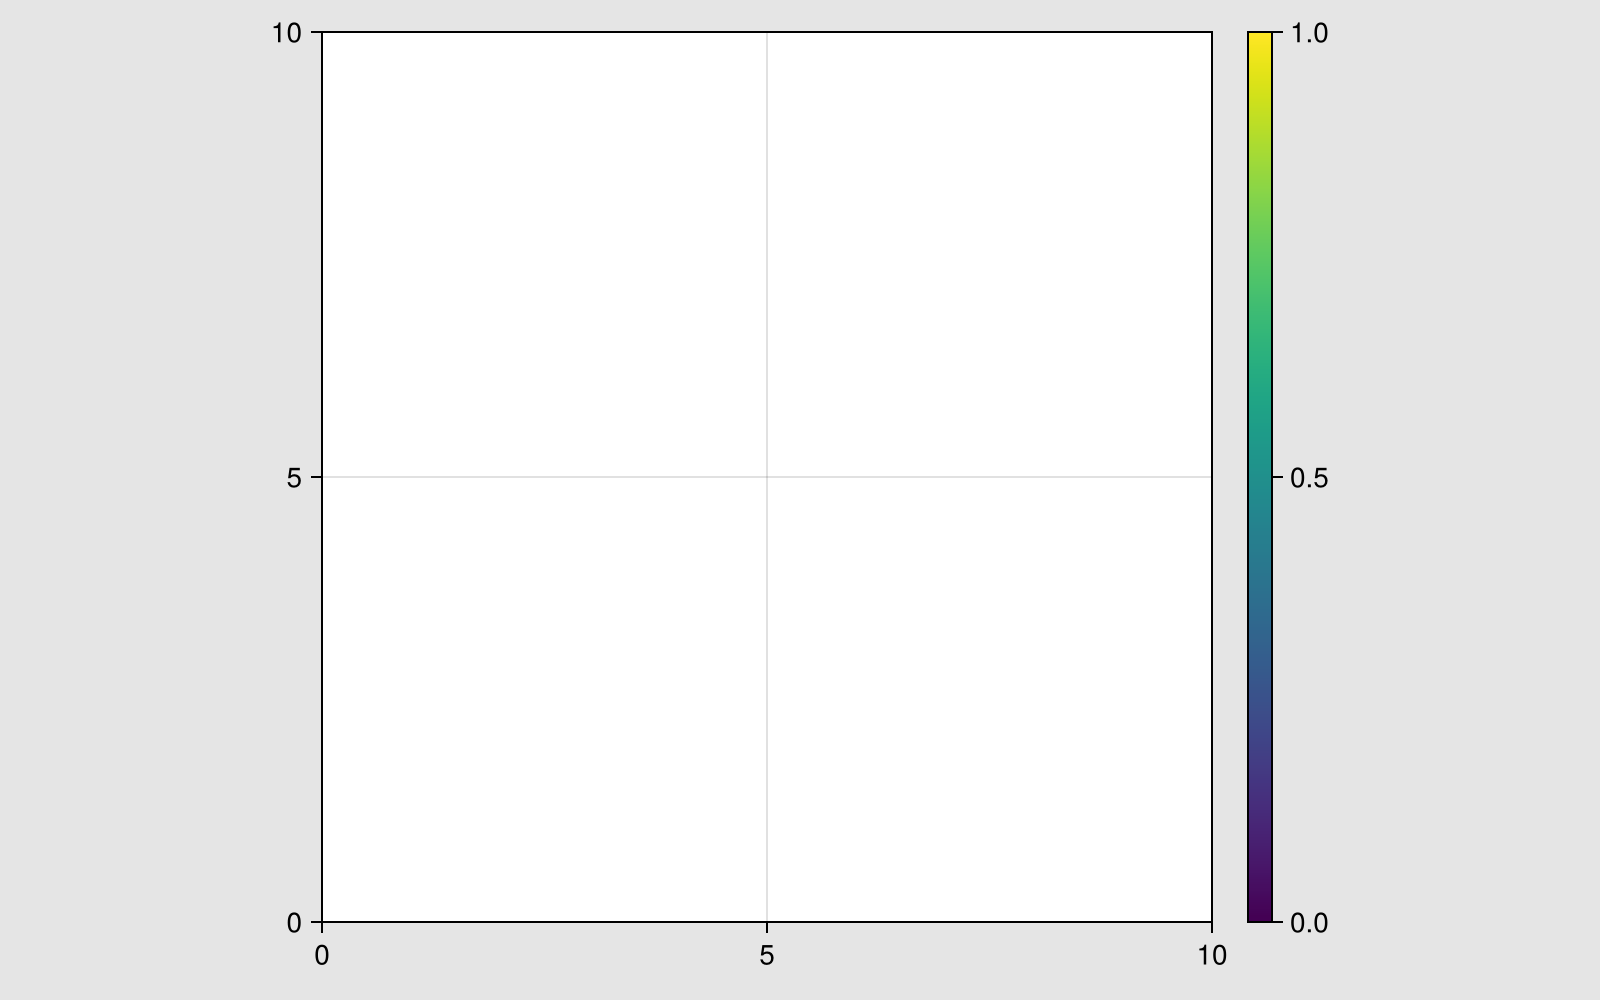

In [41]:
f = Figure(size = (800, 500))
ax = Axis(f[1, 1])
Colorbar(f[1, 2])
colsize!(f.layout, 1, Aspect(1, 1.0))
f

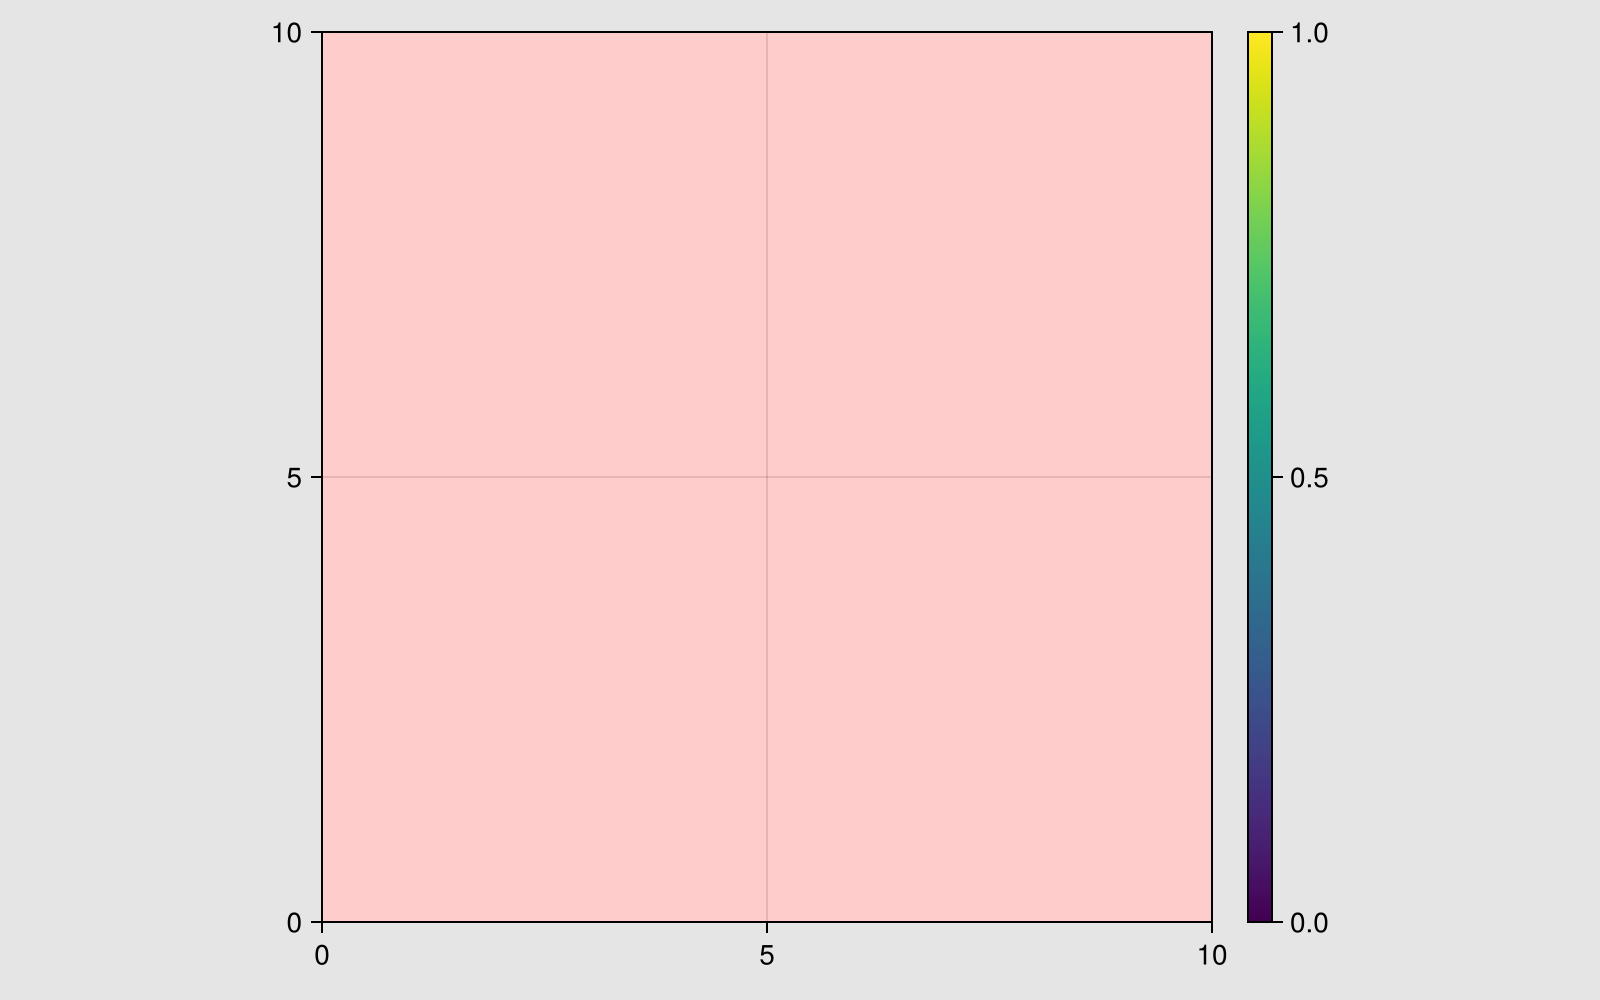

In [42]:
Box(f[1, 1], color = (:red, 0.2), strokewidth = 0)
f

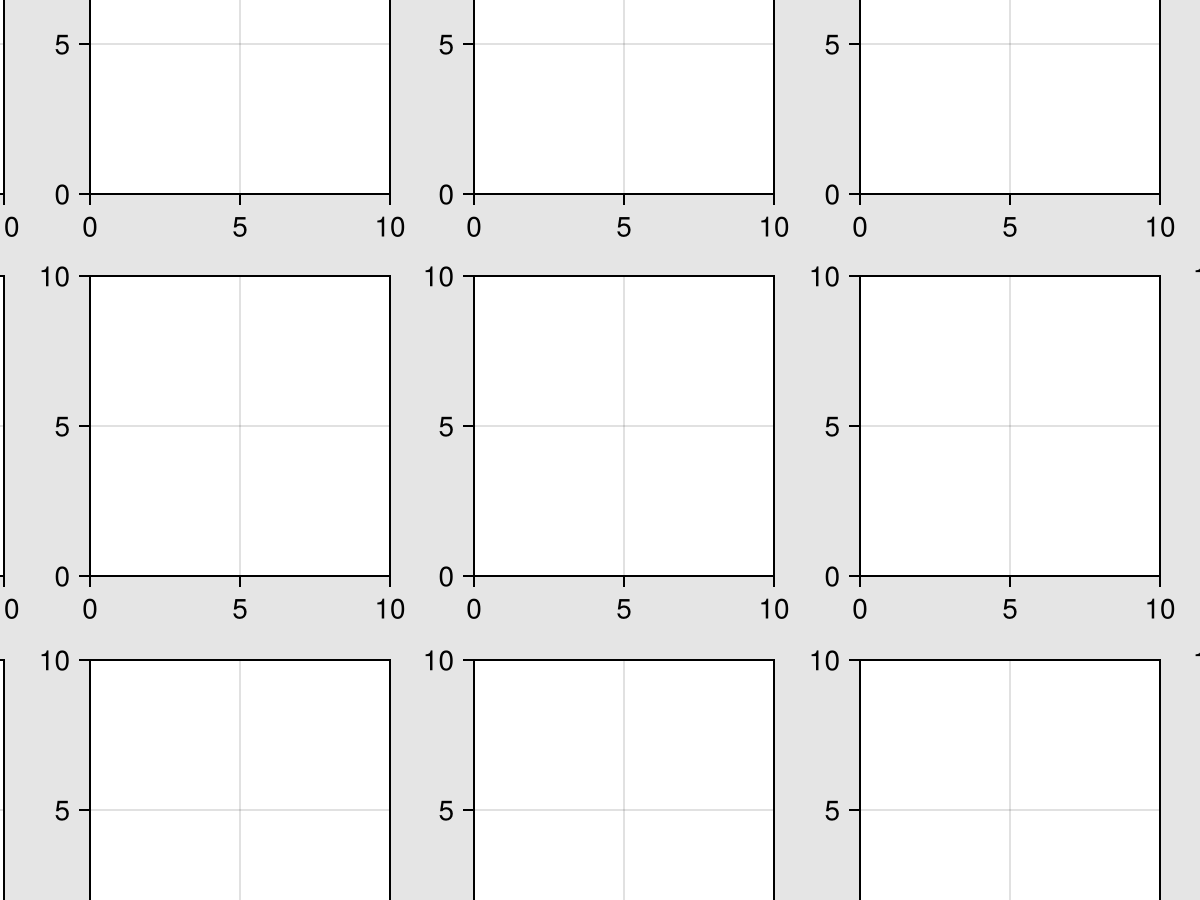

In [43]:
f = Figure()
for i in 1:5, j in 1:5
    Axis(f[i, j], width = 150, height = 150)
end
f

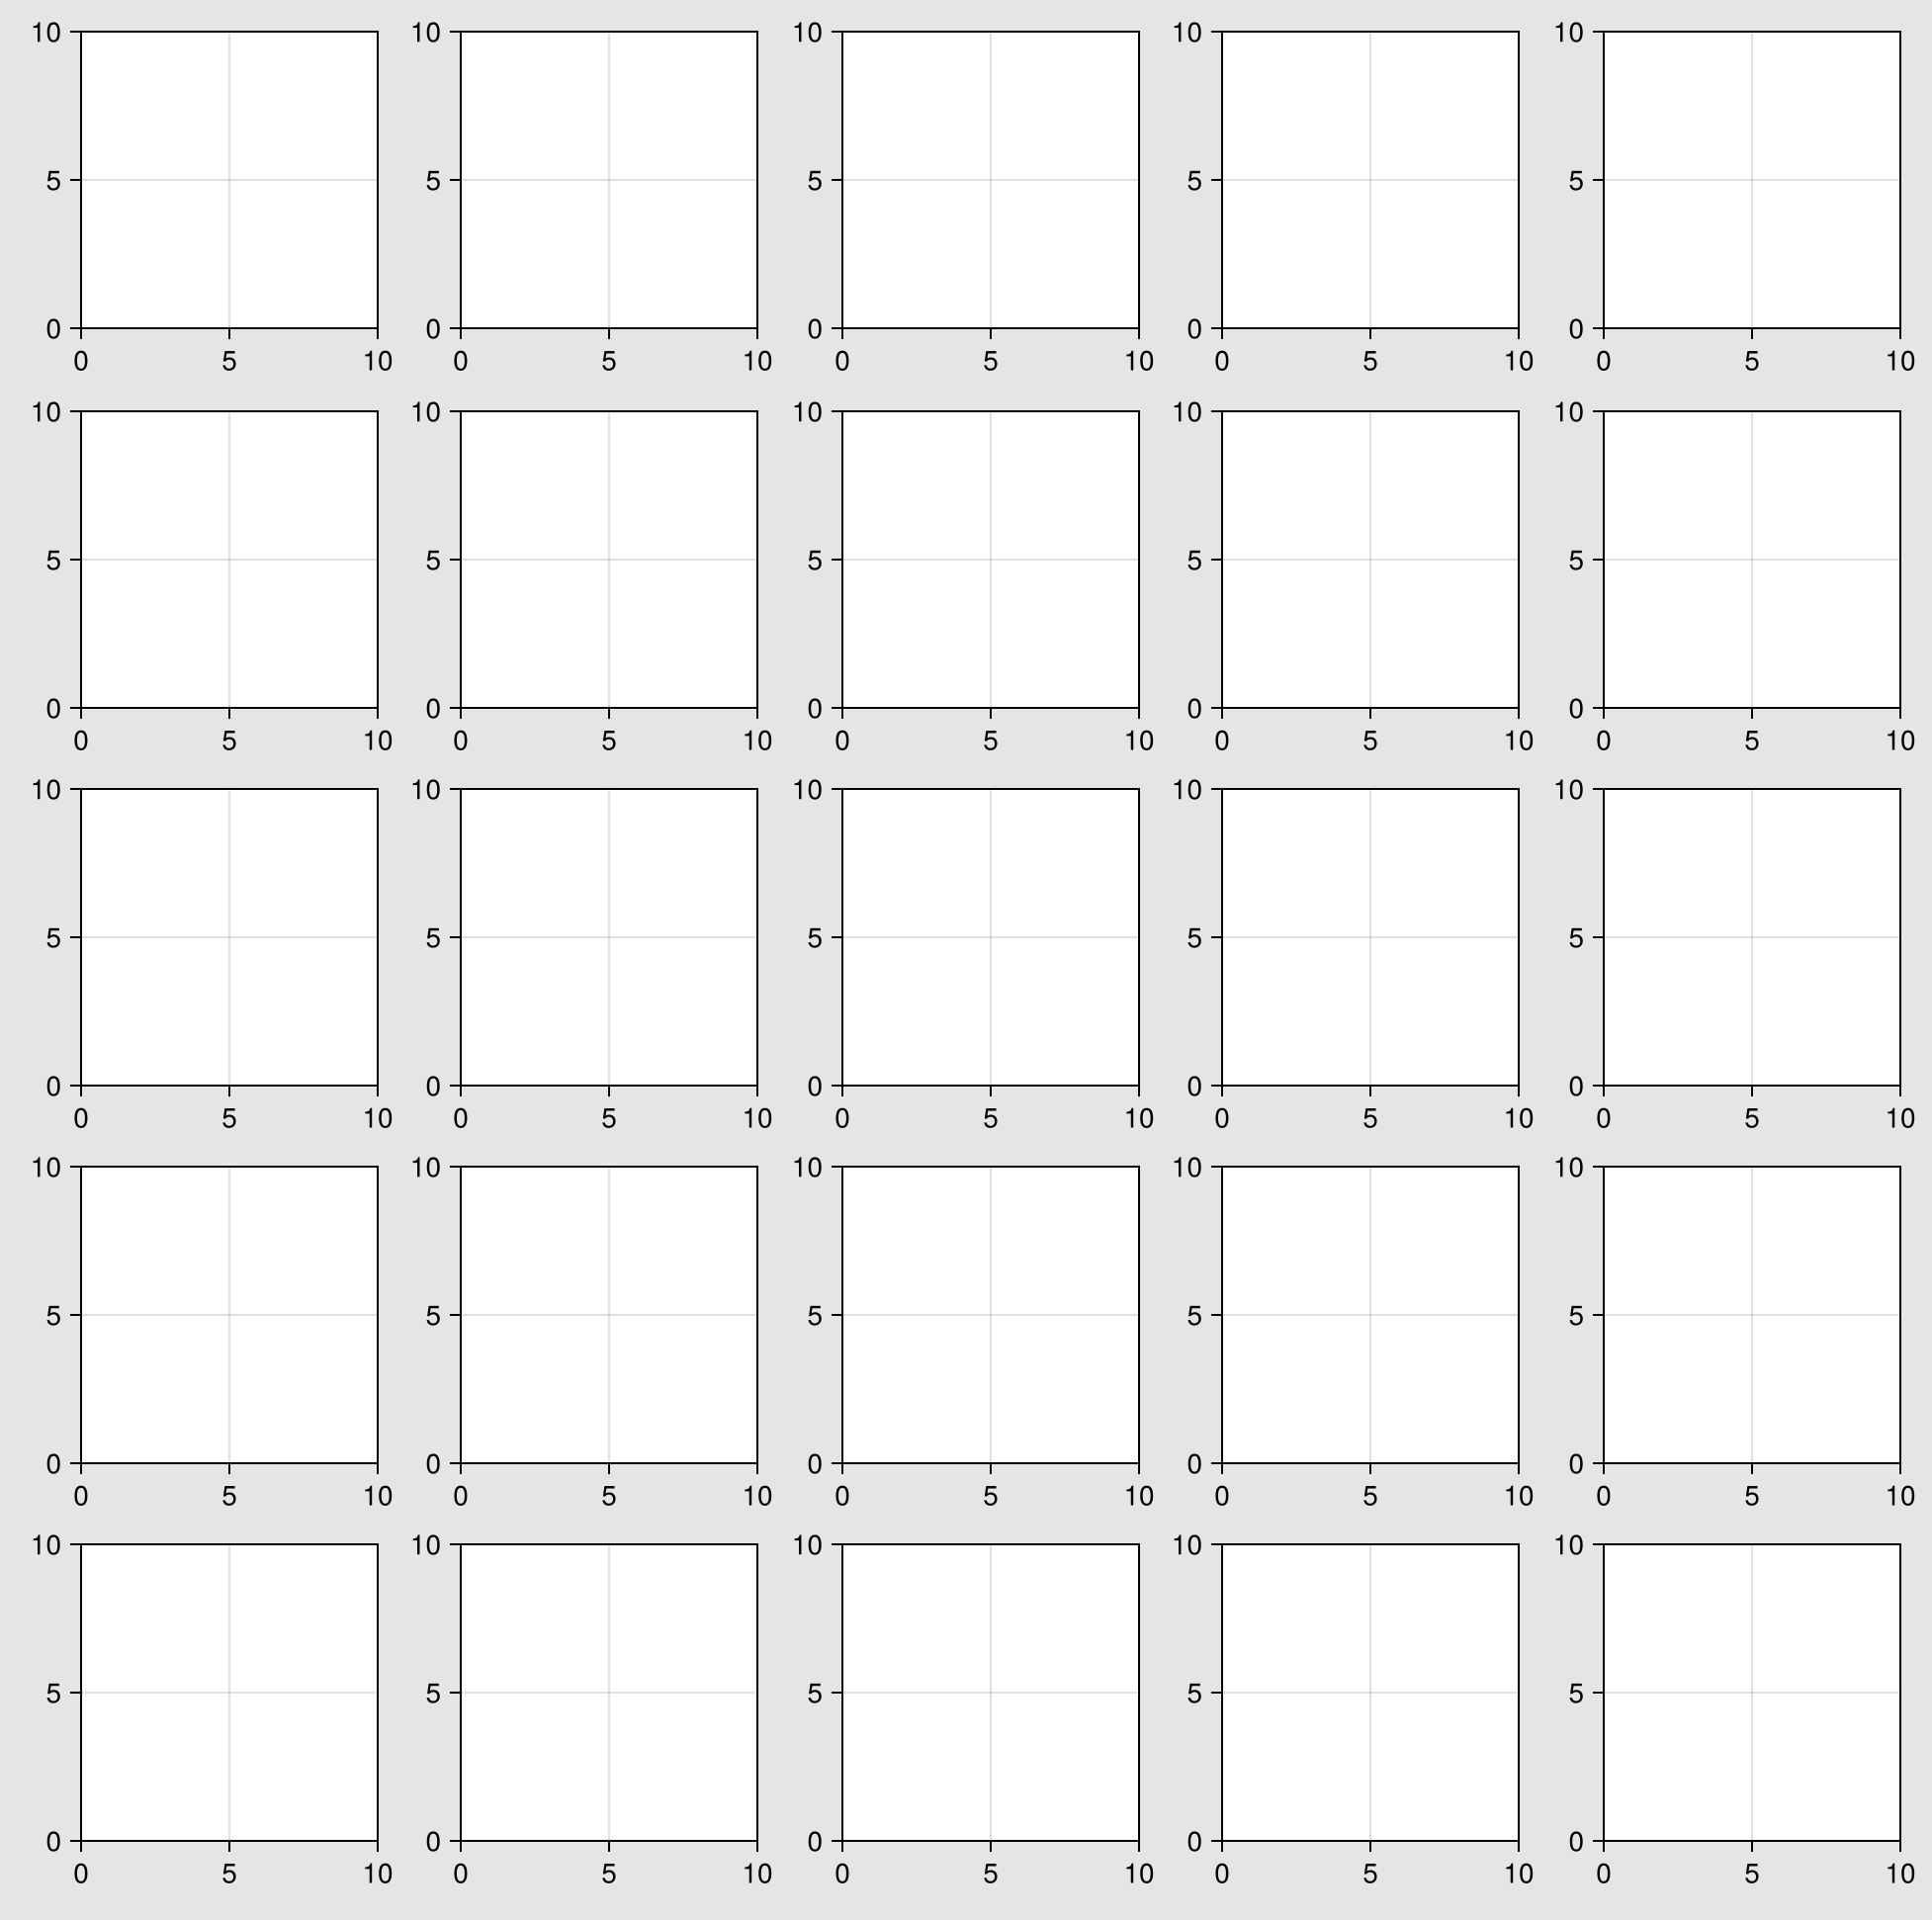

In [44]:
resize_to_layout!(f)
f

In [6]:
using GeometryBasics, LinearAlgebra

function frustum_snapshot(cam)
    r = Rect3f(Point3f(-1, -1, -1), Vec3f(2, 2, 2))
    rect_ps = coordinates(r) .|> Point3f
    insert!(rect_ps, 13, Point3f(1, -1, 1)) # fix bad line

    inv_pv = inv(cam.projectionview[])
    return map(rect_ps) do p
        p = inv_pv * to_ndim(Point4f, p, 1)
        return p[Vec(1,2,3)] / p[4]
    end
end


ex = Point3f(1,0,0)
ey = Point3f(0,1,0)
ez = Point3f(0,0,1)

fig = Figure()
scene = LScene(fig[1, 1])
cc = Makie.Camera3D(scene.scene, projectiontype = Makie.Perspective)

linesegments!(scene, Rect3f(Point3f(-1), Vec3f(2)), color = :black)
linesegments!(scene,
    [-ex, ex, -ey, ey, -ez, ez],
    color = [:red, :red, :green, :green, :blue, :blue]
)
center!(scene.scene)

cam = scene.scene.camera
eyeposition = cc.eyeposition
lookat = cc.lookat
frustum = map(pv -> frustum_snapshot(cam), cam.projectionview)

scene = LScene(fig[1, 2])
_cc = Makie.Camera3D(scene.scene, projectiontype = Makie.Orthographic)
lines!(scene, frustum, color = :blue, linestyle = :dot)
scatter!(scene, eyeposition, color = :black)
scatter!(scene, lookat, color = :black)

linesegments!(scene,
    [-ex, ex, -ey, ey, -ez, ez],
    color = [:red, :red, :green, :green, :blue, :blue]
)
linesegments!(scene, Rect3f(Point3f(-1), Vec3f(2)), color = :black)

fig

In [5]:
import Pkg; Pkg.add("GeometryBasics")

   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [5c1252a2] + GeometryBasics v0.4.11
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
